## Logistic Regression: Fit and evaluate a model

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

In this section, we will fit and evaluate a simple Logistic Regression model.

### Read in Data


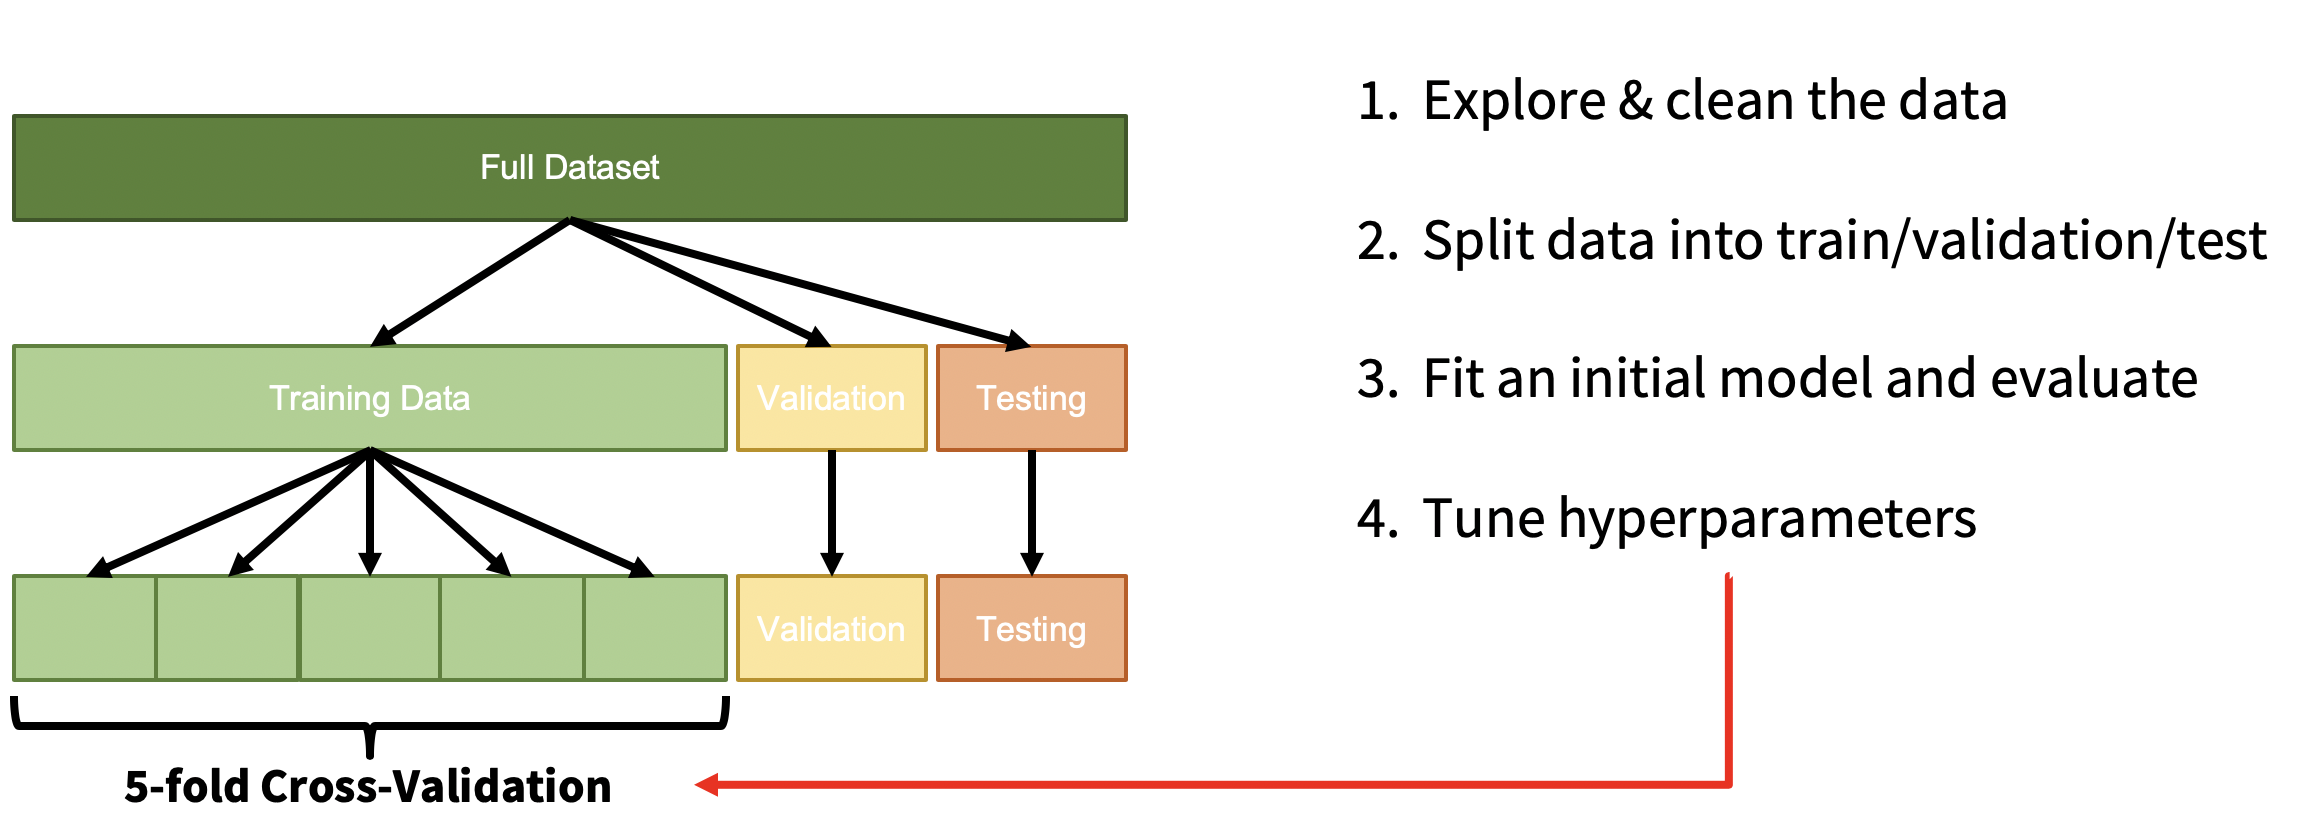

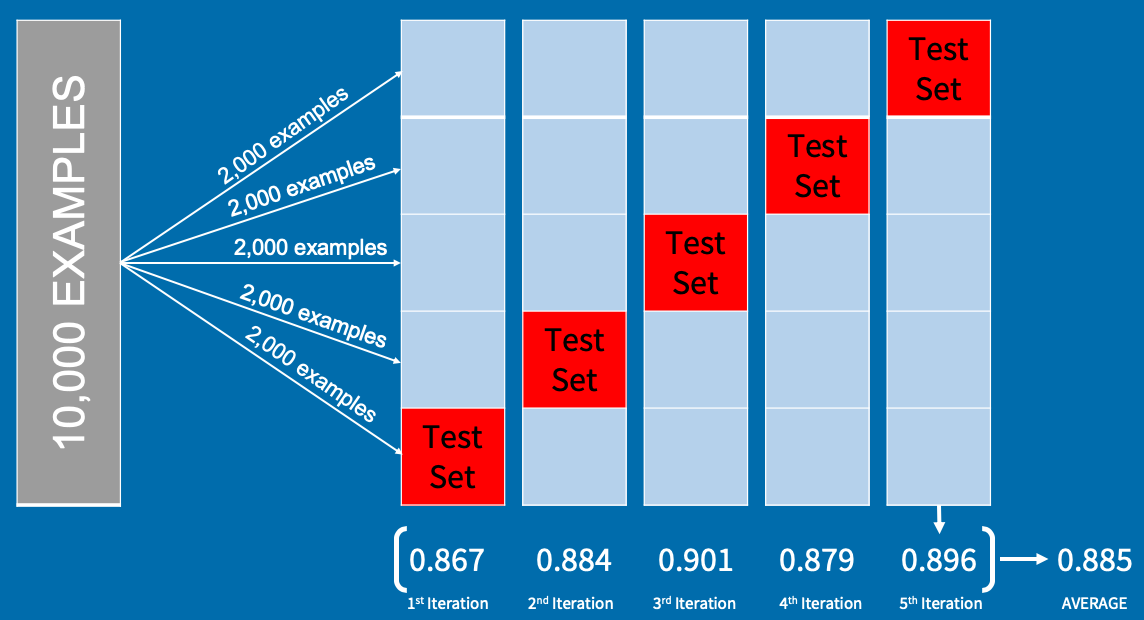

In [16]:
import joblib
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

tr_features = pd.read_csv('train_features.csv')
tr_labels = pd.read_csv('train_labels.csv', header=None)

In [17]:
tr_features # X

,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,2,0,62.000000,10.5000,0,0
1,3,0,8.000000,29.1250,5,0
2,3,0,32.000000,56.4958,0,0
3,3,1,20.000000,9.8250,1,0
4,2,1,28.000000,13.0000,0,0
...,...,...,...,...,...,...
529,3,1,21.000000,7.6500,0,0
530,1,0,29.699118,31.0000,0,0
531,3,0,41.000000,14.1083,2,0
532,1,1,14.000000,120.0000,3,1


In [18]:
tr_labels # y

,0
0,1
1,0
2,1
3,0
4,1
...,...
529,1
530,0
531,0
532,1


### Hyperparameter tuning
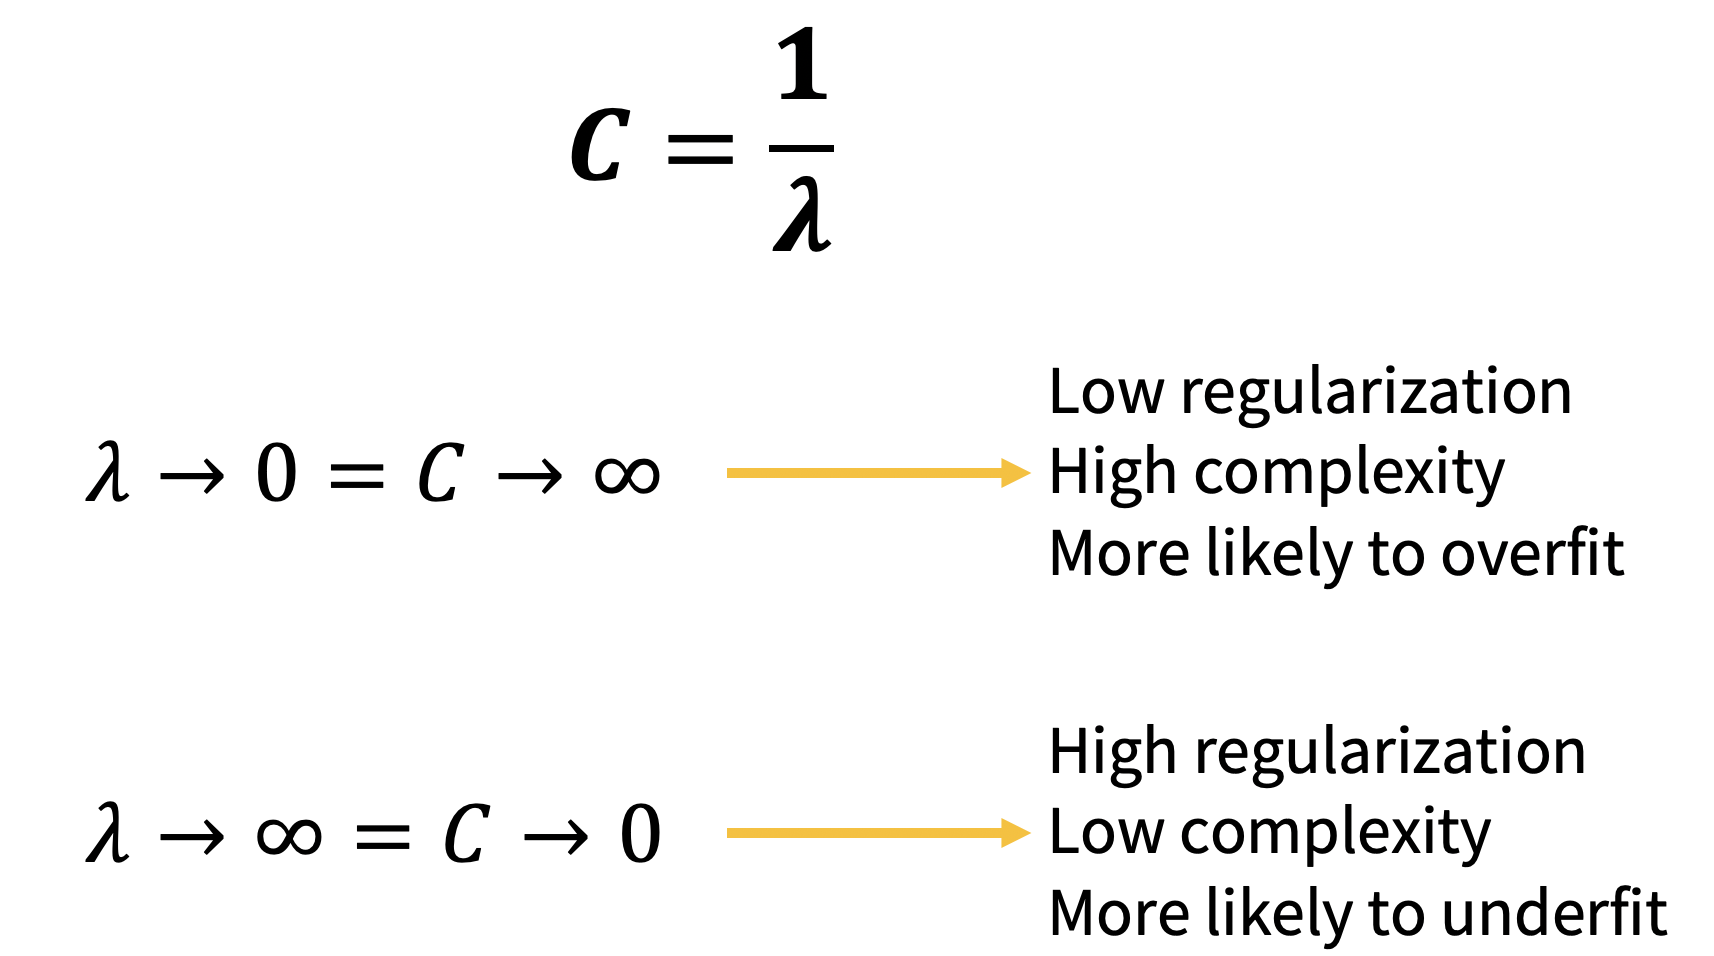


In [20]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [19]:
tr_labels.values.ravel()

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,

In [21]:
lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 1}

0.67 (+/-0.077) for {'C': 0.001}
0.708 (+/-0.098) for {'C': 0.01}
0.777 (+/-0.134) for {'C': 0.1}
0.8 (+/-0.118) for {'C': 1}
0.794 (+/-0.116) for {'C': 10}
0.794 (+/-0.116) for {'C': 100}
0.794 (+/-0.116) for {'C': 1000}


C:\Users\karthick\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\karthick\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

In [22]:
cv

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [23]:
cv.best_estimator_

LogisticRegression(C=1)

In [24]:
cv.best_score_

0.7997178628107917

In [25]:
cv.best_params_

{'C': 1}

In [26]:
cv.n_splits_ #The number of cross-validation splits (folds/iterations).

5

In [27]:
cv.refit_time_

0.017951488494873047

In [28]:
cv.feature_names_in_

array(['Pclass', 'Sex', 'Age', 'Fare', 'Family_cnt', 'Cabin_ind'],
      dtype=object)

In [29]:
cv.cv_results_

{'mean_fit_time': array([0.00737538, 0.00937943, 0.01146979, 0.0116075 , 0.01096516,
        0.01397595, 0.01435022]),
 'std_fit_time': array([0.00079258, 0.00102077, 0.00139615, 0.00103521, 0.00140609,
        0.00126175, 0.00214568]),
 'mean_score_time': array([0.00099635, 0.00139112, 0.00120387, 0.00099745, 0.00100865,
        0.00099006, 0.0011972 ]),
 'std_score_time': array([1.90859992e-05, 8.00431066e-04, 4.11821057e-04, 1.78750981e-05,
        1.48054674e-05, 1.55763075e-05, 3.85428292e-04]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100},
  {'C': 1000}],
 'split0_test_score': array([0.69158879, 0.76635514, 0.82242991, 0.85981308, 0.85046729,
        0.85046729, 0.85046729]),
 'split1_test_score': array([0.71028037, 0.73831776, 0.82242991, 0.8317

### Write out pickled model

In [7]:
joblib.dump(cv.best_estimator_, 'LR_model.pkl')

['../../../LR_model.pkl']